In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
def select_data_category(data, category):
    cat = data[category].unique()
    print('Select from the following categories')
    for idx,value in enumerate(cat):
        print(f'Enter {idx} to select {value}')
    selection = int(input('Selection: '))
    return data[data[category]==cat[selection]]

In [3]:
# Remove content parentheses from a string
def remove_char(test_str):
    test_str = str(test_str)
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in test_str:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret

In [4]:
df = pd.read_csv ("Data_Lv2_USDA_PackagedMeals.csv")
# df = select_data_category(df,'branded_food_category') # Run line to analyze a single food category

df['ingredients'] = df['ingredients'].apply(remove_char)

all_ing = [] # get a list of all ingredients
for ing in df['ingredients']:
    lst = ing.split(',')
    lst = list(map(str.strip,lst))
    all_ing += list(map(lambda _: _.strip('*.'),lst))
all_ing = pd.Series(map(str.strip,all_ing))

In [7]:
count = all_ing.value_counts()
n = 20
count[:n] # top n ingredients

salt                    3277
water                   2651
sugar                   1665
citric acid             1204
spices                   833
soybean oil              792
sodium phosphate         685
xanthan gum              649
dextrose                 621
natural flavor           605
garlic                   592
yeast extract            581
maltodextrin             575
modified corn starch     558
whey                     524
nonfat milk              459
wheat                    457
soy lecithin             456
onions                   454
sea salt                 452
dtype: int64

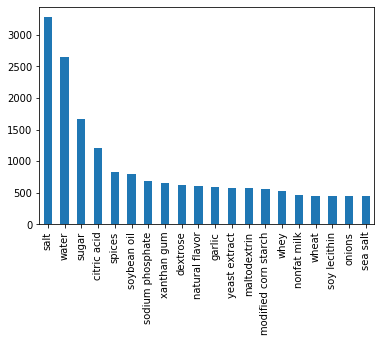

In [8]:
# Plot top n ingredients
count[:n].plot(kind='bar')